In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\86180\Downloads\penguins.csv") 
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
print(df['island'].unique())
print(df['species'].unique())
print(df['sex'].unique())

['Torgersen' 'Biscoe' 'Dream']
['Adelie' 'Chinstrap' 'Gentoo']
['MALE' 'FEMALE']


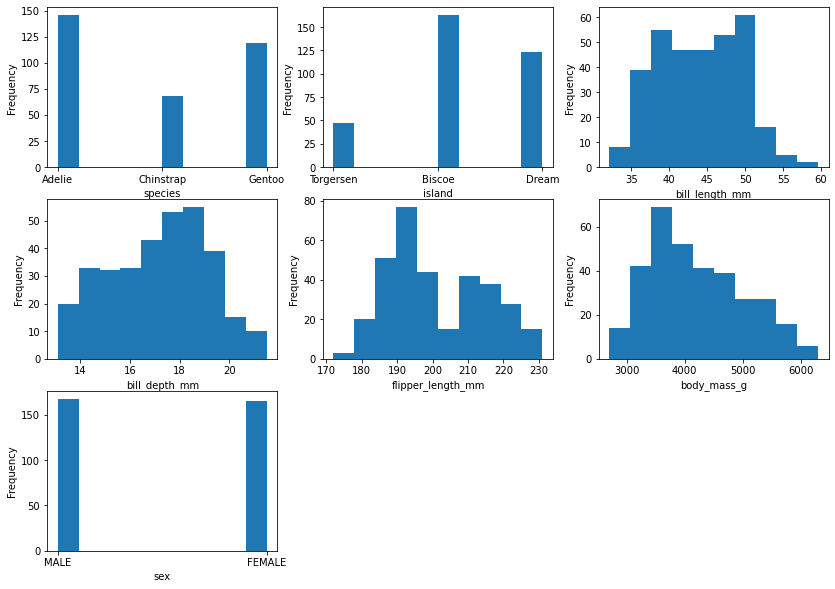

In [7]:
plt.figure(figsize=(14, 10)) 
sub = [331,332,333,334,335,336,337]
statistics = ['species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']
for i in range(7): 
    plt.subplot(sub[i])
    plt.hist(df[statistics[i]])
    plt.ylabel('Frequency')
    plt.xlabel(statistics[i])

In [8]:
df['sex'] = df['sex'].map({'MALE': 1,'FEMALE': 0})
df['island']=df['island'].map({'Torgersen':2, 'Biscoe':1, 'Dream':0})
df['species']=df['species'].map({'Adelie':2, 'Chinstrap':1, 'Gentoo':0})


x = df[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]
y = df[['species']]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,train_size=0.75)

In [9]:
from sklearn import tree
max_depths = [5,10,15]
least_node_sizes = [1,5,10]
models = []
for i in range(len(max_depths)):
    for j in range(len(least_node_sizes)):
        clf=tree.DecisionTreeClassifier(max_depth = max_depths[i],min_samples_leaf = least_node_sizes[j])
        clf.fit(x_train,y_train)
        models.append(clf)
        train_pre = clf.predict(x_train)
        test_pre = clf.predict(x_test)
        train_acc = clf.score(x_train,y_train)
        test_acc = clf.score(x_test,y_test)
#         print(train_pre)
#         train_acc = accuracy(train_pre,y_train)
#         test_acc = accuracy(test_pre,y_test)
        print('when maximum depths is {}, least node sizes is {}:'.format(max_depths[i],least_node_sizes[j]))
        print('the train accuracy is {}, the test accuracy is {}'.format(train_acc,test_acc))

when maximum depths is 5, least node sizes is 1:
the train accuracy is 1.0, the test accuracy is 0.9642857142857143
when maximum depths is 5, least node sizes is 5:
the train accuracy is 0.963855421686747, the test accuracy is 0.9404761904761905
when maximum depths is 5, least node sizes is 10:
the train accuracy is 0.9518072289156626, the test accuracy is 0.9404761904761905
when maximum depths is 10, least node sizes is 1:
the train accuracy is 1.0, the test accuracy is 0.9761904761904762
when maximum depths is 10, least node sizes is 5:
the train accuracy is 0.963855421686747, the test accuracy is 0.9523809523809523
when maximum depths is 10, least node sizes is 10:
the train accuracy is 0.9518072289156626, the test accuracy is 0.9404761904761905
when maximum depths is 15, least node sizes is 1:
the train accuracy is 1.0, the test accuracy is 0.9761904761904762
when maximum depths is 15, least node sizes is 5:
the train accuracy is 0.963855421686747, the test accuracy is 0.9523809523

[Text(209.25000000000003, 195.696, 'X[3] <= 206.5\ngini = 0.628\nsamples = 249\nvalue = [91, 45, 113]'),
 Text(139.5, 152.208, 'X[1] <= 44.65\ngini = 0.41\nsamples = 155\nvalue = [1, 43, 111]'),
 Text(83.7, 108.72, 'X[1] <= 42.3\ngini = 0.084\nsamples = 114\nvalue = [0, 5, 109]'),
 Text(55.800000000000004, 65.232, 'X[2] <= 16.85\ngini = 0.019\nsamples = 102\nvalue = [0, 1, 101]'),
 Text(27.900000000000002, 21.744, 'gini = 0.18\nsamples = 10\nvalue = [0, 1, 9]'),
 Text(83.7, 21.744, 'gini = 0.0\nsamples = 92\nvalue = [0, 0, 92]'),
 Text(111.60000000000001, 65.232, 'gini = 0.444\nsamples = 12\nvalue = [0, 4, 8]'),
 Text(195.3, 108.72, 'X[4] <= 4000.0\ngini = 0.138\nsamples = 41\nvalue = [1, 38, 2]'),
 Text(167.4, 65.232, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(223.20000000000002, 65.232, 'gini = 0.403\nsamples = 12\nvalue = [1, 9, 2]'),
 Text(279.0, 152.208, 'X[2] <= 16.65\ngini = 0.082\nsamples = 94\nvalue = [90, 2, 2]'),
 Text(251.10000000000002, 108.72, 'gini = 0.0\nsam

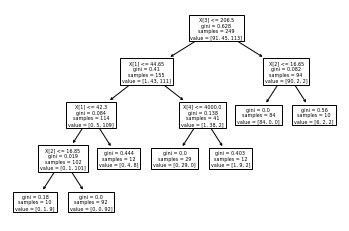

In [10]:
tree.plot_tree(clf)

In [11]:
from sklearn.ensemble import BaggingClassifier
import warnings
number=[5,10,15]
warnings.filterwarnings("ignore")
for i in range(len(max_depths)):
    for j in range(len(number)):
        model = tree.DecisionTreeClassifier(max_depth = max_depths[i])
        clf = BaggingClassifier(base_estimator = model, n_estimators=number[j]).fit(x_train,y_train)
        train_acc = clf.score(x_train,y_train)
        test_acc = clf.score(x_test,y_test)
        print('when maximum depths is {}, the number of tree is {}:'.format(max_depths[i],number[j]))
        print('the train accuracy is {}, the test accuracy is {}'.format(train_acc,test_acc))

when maximum depths is 5, the number of tree is 5:
the train accuracy is 1.0, the test accuracy is 0.9642857142857143
when maximum depths is 5, the number of tree is 10:
the train accuracy is 0.9959839357429718, the test accuracy is 0.9880952380952381
when maximum depths is 5, the number of tree is 15:
the train accuracy is 1.0, the test accuracy is 0.9880952380952381
when maximum depths is 10, the number of tree is 5:
the train accuracy is 1.0, the test accuracy is 0.9642857142857143
when maximum depths is 10, the number of tree is 10:
the train accuracy is 0.9959839357429718, the test accuracy is 0.9880952380952381
when maximum depths is 10, the number of tree is 15:
the train accuracy is 1.0, the test accuracy is 0.9880952380952381
when maximum depths is 15, the number of tree is 5:
the train accuracy is 1.0, the test accuracy is 0.9880952380952381
when maximum depths is 15, the number of tree is 10:
the train accuracy is 1.0, the test accuracy is 0.9880952380952381
when maximum dep

In [12]:
from sklearn.ensemble import RandomForestClassifier
number=[5,10,15]
m = [2,3,4]
for i in range(len(m)):
    for j in range(len(number)):
        clf = RandomForestClassifier(n_estimators=number[j],min_samples_split=m[i]).fit(x_train,y_train)
        train_acc = clf.score(x_train,y_train)
        test_acc = clf.score(x_test,y_test)
        print('when m is {}, the number of tree is {}:'.format(m[i],number[j]))
        print('the train accuracy is {}, the test accuracy is {}'.format(train_acc,test_acc))

when m is 2, the number of tree is 5:
the train accuracy is 1.0, the test accuracy is 1.0
when m is 2, the number of tree is 10:
the train accuracy is 1.0, the test accuracy is 1.0
when m is 2, the number of tree is 15:
the train accuracy is 1.0, the test accuracy is 1.0
when m is 3, the number of tree is 5:
the train accuracy is 0.9959839357429718, the test accuracy is 0.9880952380952381
when m is 3, the number of tree is 10:
the train accuracy is 0.9959839357429718, the test accuracy is 1.0
when m is 3, the number of tree is 15:
the train accuracy is 1.0, the test accuracy is 0.9880952380952381
when m is 4, the number of tree is 5:
the train accuracy is 1.0, the test accuracy is 0.9880952380952381
when m is 4, the number of tree is 10:
the train accuracy is 1.0, the test accuracy is 0.9880952380952381
when m is 4, the number of tree is 15:
the train accuracy is 0.9959839357429718, the test accuracy is 1.0


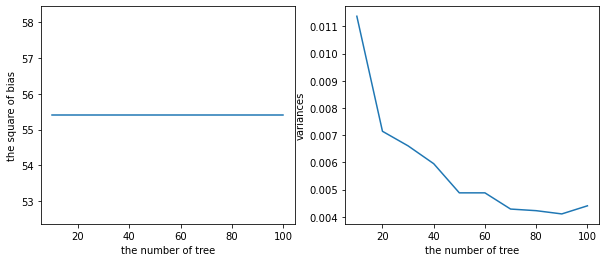

In [13]:
from mlxtend.evaluate import bias_variance_decomp
plt.figure(figsize=(10, 4)) 
number = np.arange(10,110,10)
biases = []
variances = []
for i in range(len(number)):
    clf = RandomForestClassifier(n_estimators=number[i]).fit(x_train,y_train)
    avg_expected_loss, bias, var = bias_variance_decomp(clf, np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test), loss='0-1_loss',random_seed=123)
    biases.append(bias)
    variances.append(var)
plt.subplot(121)
plt.plot(number, biases)
plt.ylabel('the square of bias')
plt.xlabel('the number of tree')
plt.subplot(122)
plt.plot(number, variances)
plt.ylabel('variances')
plt.xlabel('the number of tree')
plt.show()